# Gráficos de dispersión simples

Otro tipo de diagrama de uso común es el diagrama de dispersión simple, un primo cercano del diagrama de líneas.
En lugar de que los puntos se unan mediante segmentos de línea, aquí los puntos se representan individualmente con un punto, un círculo u otra forma.
Comenzaremos configurando el cuaderno para trazar e importar las funciones que usaremos:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Gráficos de dispersión con ``plt.plot``
En la sección anterior analizamos ``plt.plot``/``ax.plot`` para producir diagramas de líneas.
Resulta que esta misma función también puede producir diagramas de dispersión:

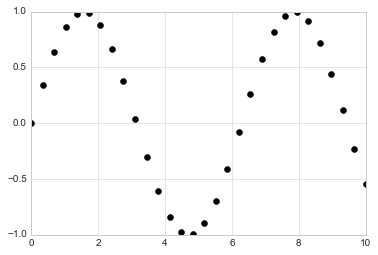

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

El tercer argumento en la llamada de función es un carácter que representa el tipo de símbolo utilizado para el trazado. Así como puede especificar opciones como ``'-'``, ``'--'`` para controlar el estilo de línea, el estilo de marcador tiene su propio conjunto de códigos de cadena corta. La lista completa de símbolos disponibles se puede ver en la documentación de ``plt.plot``, o en la documentación en línea de Matplotlib. La mayoría de las posibilidades son bastante intuitivas, y mostraremos algunas de las más comunes aquí:

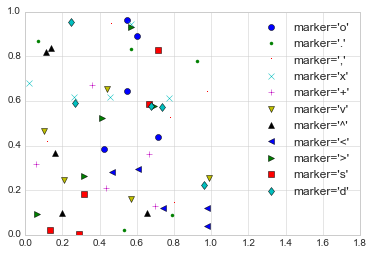

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Para aún más posibilidades, estos códigos de caracteres se pueden usar junto con códigos de línea y color para trazar puntos junto con una línea que los conecta:

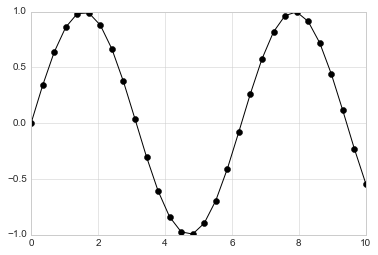

In [ ]:
plt.plot(x, y, '-ok');

Los argumentos de palabras clave adicionales para ``plt.plot`` especifican una amplia gama de propiedades de las líneas y marcadores:

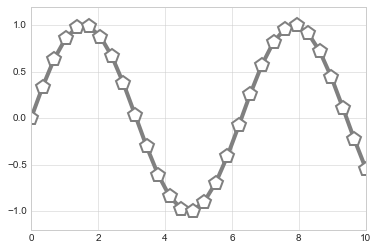

In [ ]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

Este tipo de flexibilidad en la función ``plt.plot`` permite una amplia variedad de posibles opciones de visualización.
Para obtener una descripción completa de las opciones disponibles, consulte la documentación ``plt.plot``.

## Gráficos de dispersión con ``plt.scatter``
Un segundo método más poderoso para crear diagramas de dispersión es la función ``plt.scatter``, que se puede usar de manera muy similar a la función ``plt.plot``:

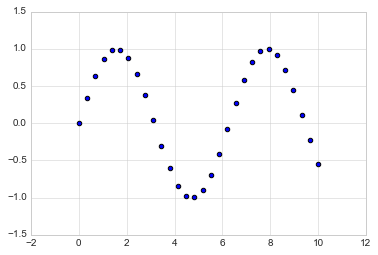

In [ ]:
plt.scatter(x, y, marker='o');

La principal diferencia entre ``plt.scatter`` y ``plt.plot`` es que se puede usar para crear diagramas de dispersión donde las propiedades de cada punto individual (tamaño, color de cara, color de borde, etc.) se pueden individualmente controlados o mapeados a los datos.
Mostremos esto creando un gráfico de dispersión aleatoria con puntos de muchos colores y tamaños.
Para ver mejor los resultados superpuestos, también usaremos la palabra clave ``alfa`` para ajustar el nivel de transparencia:

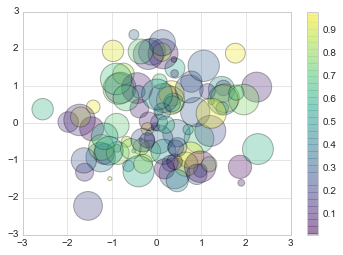

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Tenga en cuenta que el argumento de color se asigna automáticamente a una escala de color (que se muestra aquí con el comando ``colorbar()``), y que el argumento de tamaño se proporciona en píxeles.
De esta forma, el color y el tamaño de los puntos se pueden utilizar para transmitir información en la visualización, con el fin de visualizar datos multidimensionales.
Por ejemplo, podríamos usar los datos de Iris de Scikit-Learn, donde cada muestra es uno de los tres tipos de flores en las que se ha medido cuidadosamente el tamaño de sus pétalos y sépalos:

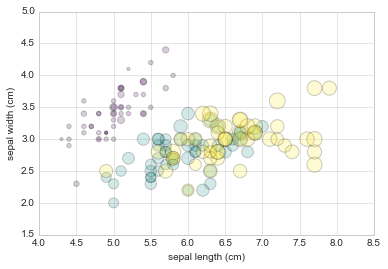

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Podemos ver que este gráfico de dispersión nos ha dado la capacidad de explorar simultáneamente cuatro dimensiones diferentes de los datos:
la ubicación (x, y) de cada punto corresponde a la longitud y el ancho del sépalo, el tamaño del punto está relacionado con el ancho del pétalo y el color está relacionado con la especie de flor en particular.
Los diagramas de dispersión multicolores y de características múltiples como este pueden ser útiles tanto para la exploración como para la presentación de datos.

## ``plot`` versus ``scatter``: una nota sobre la eficiencia
Aparte de las diferentes características disponibles en ``plt.plot`` y ``plt.scatter``, ¿por qué elegirías usar una sobre la otra? Si bien no importa tanto para pequeñas cantidades de datos, ya que los conjuntos de datos superan unos pocos miles de puntos, ``plt.plot`` puede ser notablemente más eficiente que ``plt.scatter``.
La razón es que ``plt.scatter`` tiene la capacidad de representar un tamaño y/o color diferente para cada punto, por lo que el renderizador debe hacer el trabajo extra de construir cada punto individualmente.
En ``plt.plot``, por otro lado, los puntos siempre son esencialmente clones entre sí, por lo que el trabajo de determinar la apariencia de los puntos se realiza solo una vez para todo el conjunto de datos.
Para grandes conjuntos de datos, la diferencia entre estos dos puede conducir a un rendimiento muy diferente y, por esta razón, se debe preferir ``plt.plot`` a ``plt.scatter`` para grandes conjuntos de datos.